In [1]:
import sys, os

# ✅ Ensure Python knows where your utils file is
sys.path.append(r"d:\AI WORKFORCE\EndToEnd-churn")

# ✅ Optional check: confirm the file exists
print(os.path.exists(r"d:\AI WORKFORCE\EndToEnd-churn\my_mlflow_utils.py"))

# ✅ Now safely import and reload your function
import importlib
import my_mlflow_utils
importlib.reload(my_mlflow_utils)

from my_mlflow_utils import run_models

print("✅ run_models imported successfully!")


True
✅ run_models imported successfully!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


## EDA

In [3]:
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
missing_values=df.isnull().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
to_drop=df.duplicated().sum()
to_drop

np.int64(0)

In [11]:
skews=df.select_dtypes(include='number').skew()
skews

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

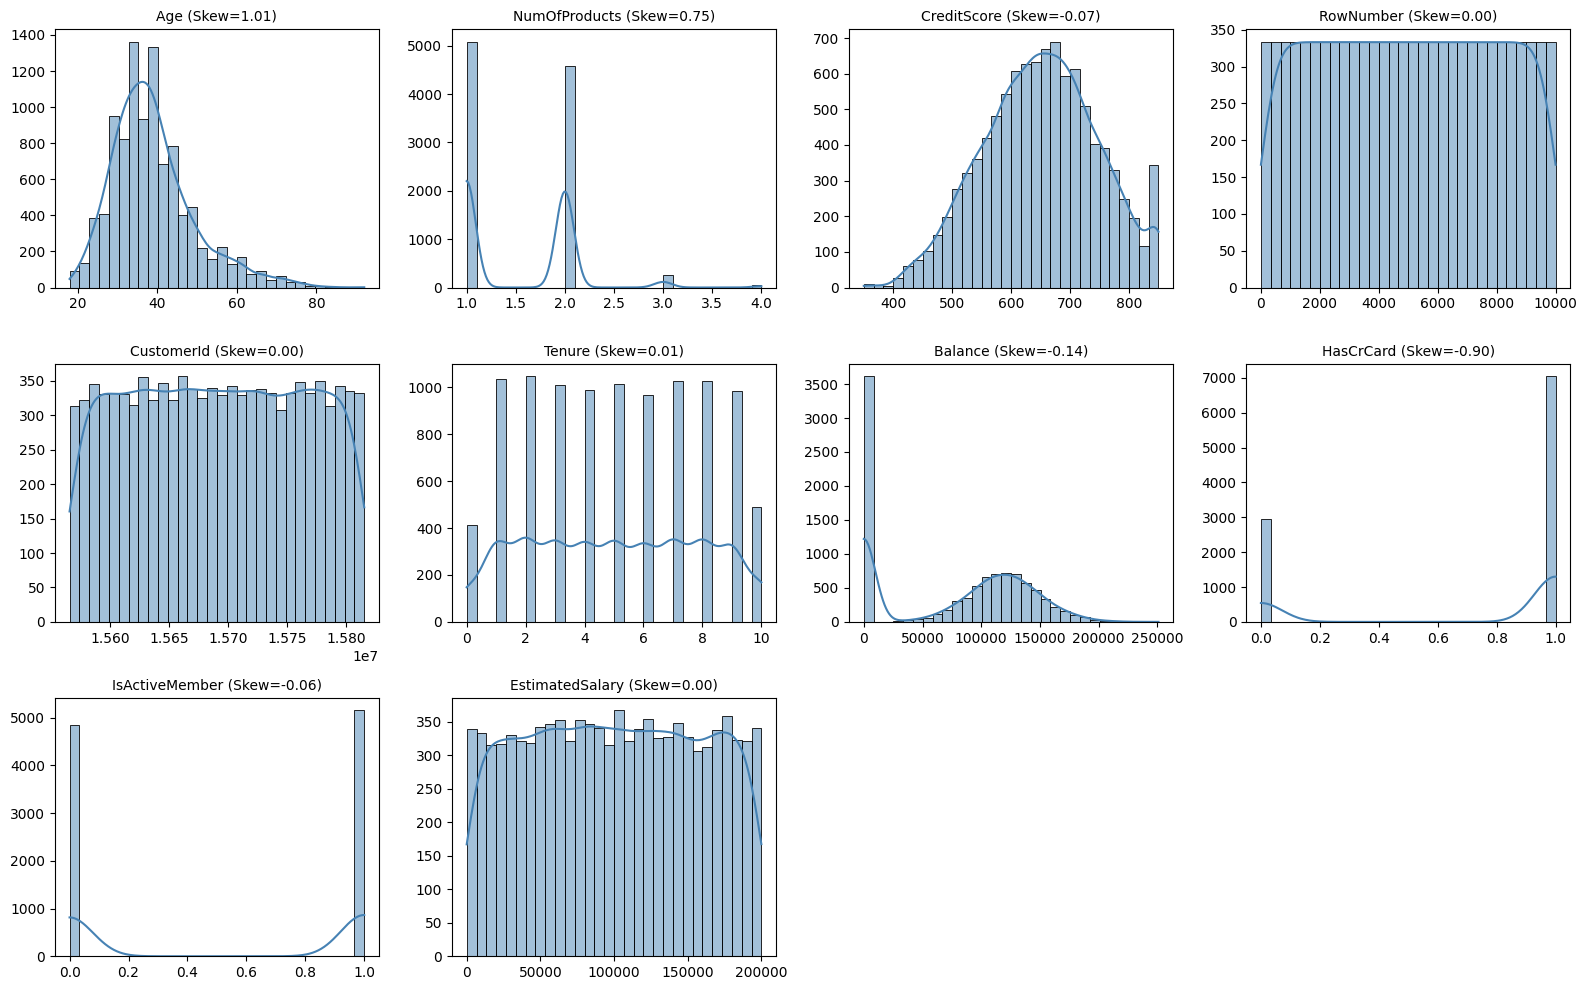

In [12]:
cols = ["Age", "NumOfProducts", "CreditScore", "RowNumber", "CustomerId",
        "Tenure", "Balance", "HasCrCard", "IsActiveMember", "EstimatedSalary"]

plt.figure(figsize=(16, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'{col} (Skew={df[col].skew():.2f})', fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [13]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols  

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [14]:
print("Number of unique values:")
print("Surname:", df['Surname'].nunique())
print("Geography:", df['Geography'].nunique())
print("Gender:", df['Gender'].nunique())


Number of unique values:
Surname: 2932
Geography: 3
Gender: 2


In [15]:
df.drop(['Surname', 'CustomerId','RowNumber'], axis=1, inplace=True)


In [16]:
df= pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [18]:
print(df['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


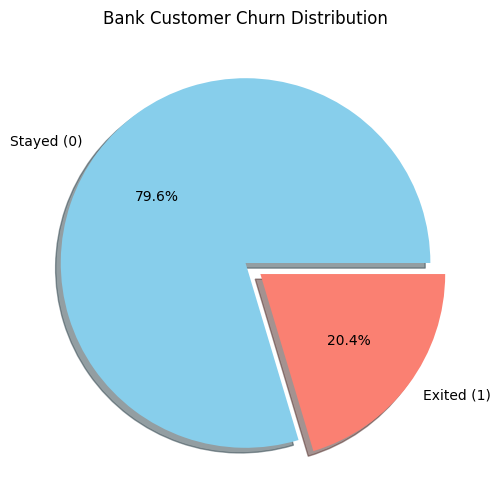

In [19]:
counts = df['Exited'].value_counts()
labels = ['Stayed (0)', 'Exited (1)']

explode = (0, 0.1)
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True, colors=['skyblue', 'salmon'])
plt.title("Bank Customer Churn Distribution")
plt.show()


In [20]:
corr=df.select_dtypes(include='number').corr()

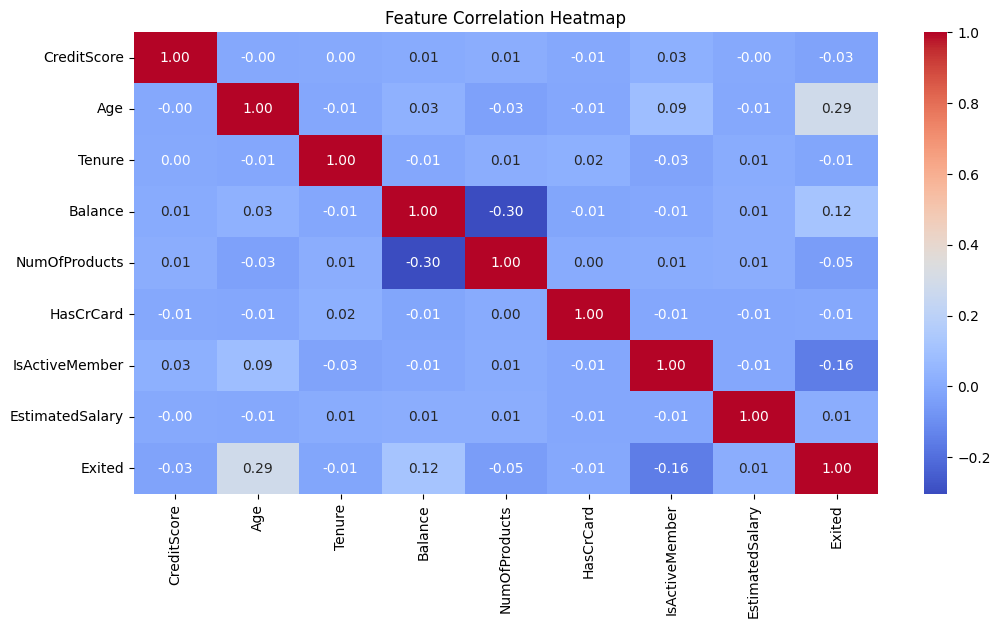

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

### Random Forest

In [22]:
X = df.drop('Exited', axis=1)
y = df['Exited']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf= RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)


rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\nRandomForestClassifier (class_weight='balanced') Results\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



RandomForestClassifier (class_weight='balanced') Results

Accuracy: 0.862

Confusion Matrix:
 [[2314   75]
 [ 339  272]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.78      0.45      0.57       611

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



### XGBoost

In [24]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [25]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({0: 6370, 1: 1630})
After SMOTE: Counter({1: 6370, 0: 6370})


In [26]:
xgb = XGBClassifier(
    n_estimators=200,      
    learning_rate=0.1,    
    max_depth=5,        
    random_state=42,
)

In [27]:
xgb.fit(X_train_res, y_train_res)
y_pred = xgb.predict(X_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.817

Confusion Matrix:
 [[1366  227]
 [ 139  268]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      1593
           1       0.54      0.66      0.59       407

    accuracy                           0.82      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.83      0.82      0.82      2000



### GradientBoosting

In [29]:
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb.fit(X_train_res, y_train_res)

y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Results")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Results
Accuracy: 0.826
Confusion Matrix:
 [[1375  218]
 [ 130  277]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89      1593
           1       0.56      0.68      0.61       407

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000



### LogisticRegression

In [30]:
logreg = LogisticRegression(
    class_weight='balanced', 
    max_iter=1000,
    random_state=42
)
logreg.fit(X_train_res, y_train_res)

y_pred_lr = logreg.predict(X_test)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Results
Accuracy: 0.734
Confusion Matrix:
 [[1238  355]
 [ 177  230]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      1593
           1       0.39      0.57      0.46       407

    accuracy                           0.73      2000
   macro avg       0.63      0.67      0.64      2000
weighted avg       0.78      0.73      0.75      2000



### DecisionTree

In [31]:
dt = DecisionTreeClassifier(
    max_depth=5,
    class_weight='balanced',
    random_state=42
)
dt.fit(X_train_res, y_train_res)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Results
Accuracy: 0.8065
Confusion Matrix:
 [[1339  254]
 [ 133  274]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87      1593
           1       0.52      0.67      0.59       407

    accuracy                           0.81      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.83      0.81      0.82      2000



### SVC

In [32]:
svm = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=42
)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Results\n")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM Results

Accuracy: 0.4595

Confusion Matrix:
 [[619 974]
 [107 300]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.39      0.53      1593
           1       0.24      0.74      0.36       407

    accuracy                           0.46      2000
   macro avg       0.54      0.56      0.45      2000
weighted avg       0.73      0.46      0.50      2000



### KNN

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Results\n")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Results

Accuracy: 0.764

Confusion Matrix:
 [[1494   99]
 [ 373   34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86      1593
           1       0.26      0.08      0.13       407

    accuracy                           0.76      2000
   macro avg       0.53      0.51      0.49      2000
weighted avg       0.69      0.76      0.71      2000



In [37]:

models = {
    "Random Forest": rf,
    "XGBoost": xgb,
    "Gradient Boosting": gb,
    "Logistic Regression": logreg,
    "Decision Tree": dt,
    "SVM": svm,
    "KNN": knn
}

In [38]:
import mlflow
import mlflow.sklearn
mlflow.set_experiment("Bank Churn Predictor")

<Experiment: artifact_location='file:///d:/AI%20WORKFORCE/EndToEnd-churn/mlruns/736491553378338670', creation_time=1761542736592, experiment_id='736491553378338670', last_update_time=1761542736592, lifecycle_stage='active', name='Bank Churn Predictor', tags={}>

In [39]:
from my_mlflow_utils import run_models

run_models(
    models,
    X_train, X_test, y_train, y_test,
    X_train_res=X_train_res,
    y_train_res=y_train_res
)



Training model: Random Forest
→ Using original training data for Random Forest


2025/10/27 15:59:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 15:59:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest → Acc: 0.8615, F1: 0.5624, ROC-AUC: 0.7036

Training model: XGBoost
→ Using SMOTE-resampled data for XGBoost


2025/10/27 15:59:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 15:59:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost → Acc: 0.8170, F1: 0.5942, ROC-AUC: 0.7580

Training model: Gradient Boosting
→ Using SMOTE-resampled data for Gradient Boosting


2025/10/27 15:59:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 15:59:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Gradient Boosting → Acc: 0.8260, F1: 0.6142, ROC-AUC: 0.7719

Training model: Logistic Regression
→ Using SMOTE-resampled data for Logistic Regression


2025/10/27 15:59:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 16:00:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logistic Regression → Acc: 0.7340, F1: 0.4637, ROC-AUC: 0.6711

Training model: Decision Tree
→ Using SMOTE-resampled data for Decision Tree


2025/10/27 16:00:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 16:00:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Decision Tree → Acc: 0.8065, F1: 0.5861, ROC-AUC: 0.7569

Training model: SVM
→ Using original training data for SVM


2025/10/27 16:00:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 16:00:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/27 16:00:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


SVM → Acc: 0.4595, F1: 0.3569, ROC-AUC: 0.5628

Training model: KNN
→ Using original training data for KNN


2025/10/27 16:00:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


KNN → Acc: 0.7640, F1: 0.1259, ROC-AUC: 0.5107


In [40]:
import pickle

models = {
    "Random Forest": rf,
    "XGBoost": xgb,
    "Gradient Boosting": gb,
    "Logistic Regression": logreg,
    "Decision Tree": dt,
    "SVM": svm,
    "KNN": knn
}

features = [col for col in df.columns if col != "Exited"]

with open("all_models.pkl", "wb") as f:
    pickle.dump((models, features), f)

print("All models and feature columns saved successfully to 'all_models.pkl'")

All models and feature columns saved successfully to 'all_models.pkl'
